# Employee Attrition Prediction

Objective is to understand the factors that influence the attrition and to predict the employees who are going to leave the company in future.

Data set is IBM HR Analytics Employee Attrition & Performance Dataset, which was downloaded from Kaggle. The dataset includes features like Age, Employee Role, Daily Rate, Job Satisfaction, Years At Company, Years In Current Role etc. and the target variables is Attrition. 

In [1]:
#Import pandas library for dataframes
import pandas as pd
import numpy as np

In [2]:
#Reading the data file
data = pd.read_csv("Employee Attrition.csv")

In [3]:
#See the first 5 rows of the dataframe
data.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome      Education EducationField  EmployeeCount  \
0                 1        College  Life Sciences              1   
1                 8  Below College  Life Sciences              1   
2                 2        College          Other              1   
3                 3         Master  Life Sciences              1   
4                 2  Below College        Medical              1   

   EmployeeNumber          ...          RelationshipSatisfaction  \
0               1          ...                               Low   
1               2          ...                         Very High   
2               4          ...                            Medium   
3               5          ...                              High   
4               7          ...                         Very High   

  StandardHours  StockOptionLevel TotalWorkingYears  TrainingTimesLastYear  \
0            80                 0                 8                      0   
1            80                 1                10                      3   
2            80                 0                 7                      3   
3            80                 0                 8                      3   
4            80                 1                 6                      3   

  WorkLifeBalance YearsAtCompany YearsInCurrentRole  YearsSinceLastPromotion  \
0             Bad              6                  4                        0   
1          Better             10                  7                        1   
2          Better              0                  0                        0   
3          Better              8                  7                        3   
4          Better              2                  2                        2   

   YearsWithCurrManager  
0                     5  
1                     7  
2                     0  
3                     0  
4                     2  

[5 rows x 35 columns]

In [4]:
#See the columns in the table
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [5]:
#See the shape of dataframe
data.shape

(1470, 35)

In [6]:
#Checking ditribution of target variable
data.Attrition.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [7]:
#see the data type of each attribute
data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                   object
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction     object
Gender                      object
HourlyRate                   int64
JobInvolvement              object
JobLevel                     int64
JobRole                     object
JobSatisfaction             object
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating           object
RelationshipSatisfaction    object
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [8]:
#See number of unique values in each column
data.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [9]:
#Check number of missing values in each column
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [10]:
#See rows with missing values
data[data.isnull().any(axis=1)]

Empty DataFrame
Columns: [Age, Attrition, BusinessTravel, DailyRate, Department, DistanceFromHome, Education, EducationField, EmployeeCount, EmployeeNumber, EnvironmentSatisfaction, Gender, HourlyRate, JobInvolvement, JobLevel, JobRole, JobSatisfaction, MaritalStatus, MonthlyIncome, MonthlyRate, NumCompaniesWorked, Over18, OverTime, PercentSalaryHike, PerformanceRating, RelationshipSatisfaction, StandardHours, StockOptionLevel, TotalWorkingYears, TrainingTimesLastYear, WorkLifeBalance, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager]
Index: []

[0 rows x 35 columns]

In [11]:
#see summary statistics
data.describe()

Age    DailyRate  DistanceFromHome  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000         1470.0   
mean     36.923810   802.485714          9.192517            1.0   
std       9.135373   403.509100          8.106864            0.0   
min      18.000000   102.000000          1.000000            1.0   
25%      30.000000   465.000000          2.000000            1.0   
50%      36.000000   802.000000          7.000000            1.0   
75%      43.000000  1157.000000         14.000000            1.0   
max      60.000000  1499.000000         29.000000            1.0   

       EmployeeNumber   HourlyRate     JobLevel  MonthlyIncome   MonthlyRate  \
count     1470.000000  1470.000000  1470.000000    1470.000000   1470.000000   
mean      1024.865306    65.891156     2.063946    6502.931293  14313.103401   
std        602.024335    20.329428     1.106940    4707.956783   7117.786044   
min          1.000000    30.000000     1.000000    1009.000000   2094.000000   
25%        491.250000    48.000000     1.000000    2911.000000   8047.000000   
50%       1020.500000    66.000000     2.000000    4919.000000  14235.500000   
75%       1555.750000    83.750000     3.000000    8379.000000  20461.500000   
max       2068.000000   100.000000     5.000000   19999.000000  26999.000000   

       NumCompaniesWorked  PercentSalaryHike  StandardHours  StockOptionLevel  \
count         1470.000000        1470.000000         1470.0       1470.000000   
mean             2.693197          15.209524           80.0          0.793878   
std              2.498009           3.659938            0.0          0.852077   
min              0.000000          11.000000           80.0          0.000000   
25%              1.000000          12.000000           80.0          0.000000   
50%              2.000000          14.000000           80.0          1.000000   
75%              4.000000          18.000000           80.0          1.000000   
max              9.000000          25.000000           80.0          3.000000   

       TotalWorkingYears  TrainingTimesLastYear  YearsAtCompany  \
count        1470.000000            1470.000000     1470.000000   
mean           11.279592               2.799320        7.008163   
std             7.780782               1.289271        6.126525   
min             0.000000               0.000000        0.000000   
25%             6.000000               2.000000        3.000000   
50%            10.000000               3.000000        5.000000   
75%            15.000000               3.000000        9.000000   
max            40.000000               6.000000       40.000000   

       YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
count         1470.000000              1470.000000           1470.000000  
mean             4.229252                 2.187755              4.123129  
std              3.623137                 3.222430              3.568136  
min              0.000000                 0.000000              0.000000  
25%              2.000000                 0.000000              2.000000  
50%              3.000000                 1.000000              3.000000  
75%              7.000000                 3.000000              7.000000  
max             18.000000                15.000000             17.000000

In [12]:
#Here the value for columns, Over18, StandardHours and EmployeeCount are same for all rows, we can eliminate these columns.
data.drop(['EmployeeCount','StandardHours','Over18','EmployeeNumber'],axis=1, inplace=True)

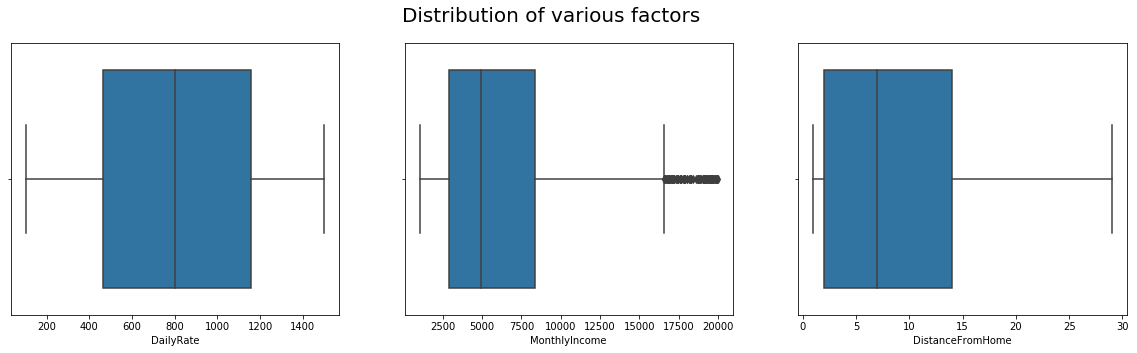

In [14]:
# check for outliers using boxplot

import matplotlib.pyplot as plt
import seaborn as sns
fig,ax = plt.subplots(1,3, figsize=(20,5))               
plt.suptitle("Distribution of various factors", fontsize=20)
sns.boxplot(data['DailyRate'], ax = ax[0]) 
sns.boxplot(data['MonthlyIncome'], ax = ax[1]) 
sns.boxplot(data['DistanceFromHome'], ax = ax[2])  
plt.show()

In [15]:
# Replacing outliers in monthly income upper whisker
Q1 = data.MonthlyIncome.quantile(0.25)
Q3 = data.MonthlyIncome.quantile(0.75)
IQR = Q3 - Q1

data['MonthlyIncome'][data.MonthlyIncome > (Q3 + 1.5 * IQR)] =(Q3 + 1.5 * IQR)


C:\Users\Tejas.gowda\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


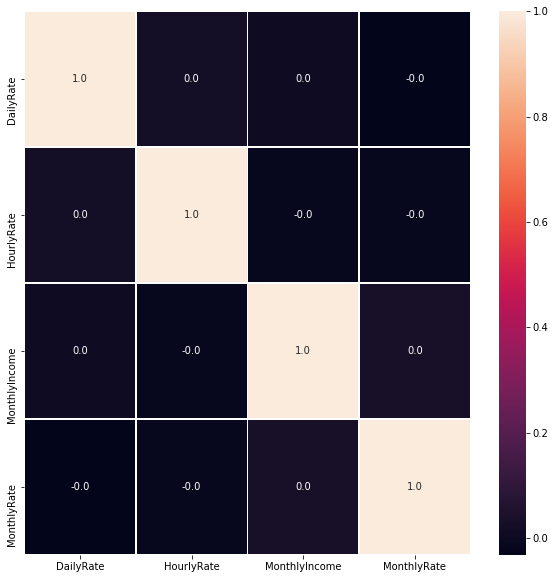

In [15]:
#Check for multicollinearity using correlation plot
f,ax = plt.subplots(figsize=(10,10))
sns.heatmap(data[['DailyRate','HourlyRate','MonthlyIncome','MonthlyRate']].corr(), 
            annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

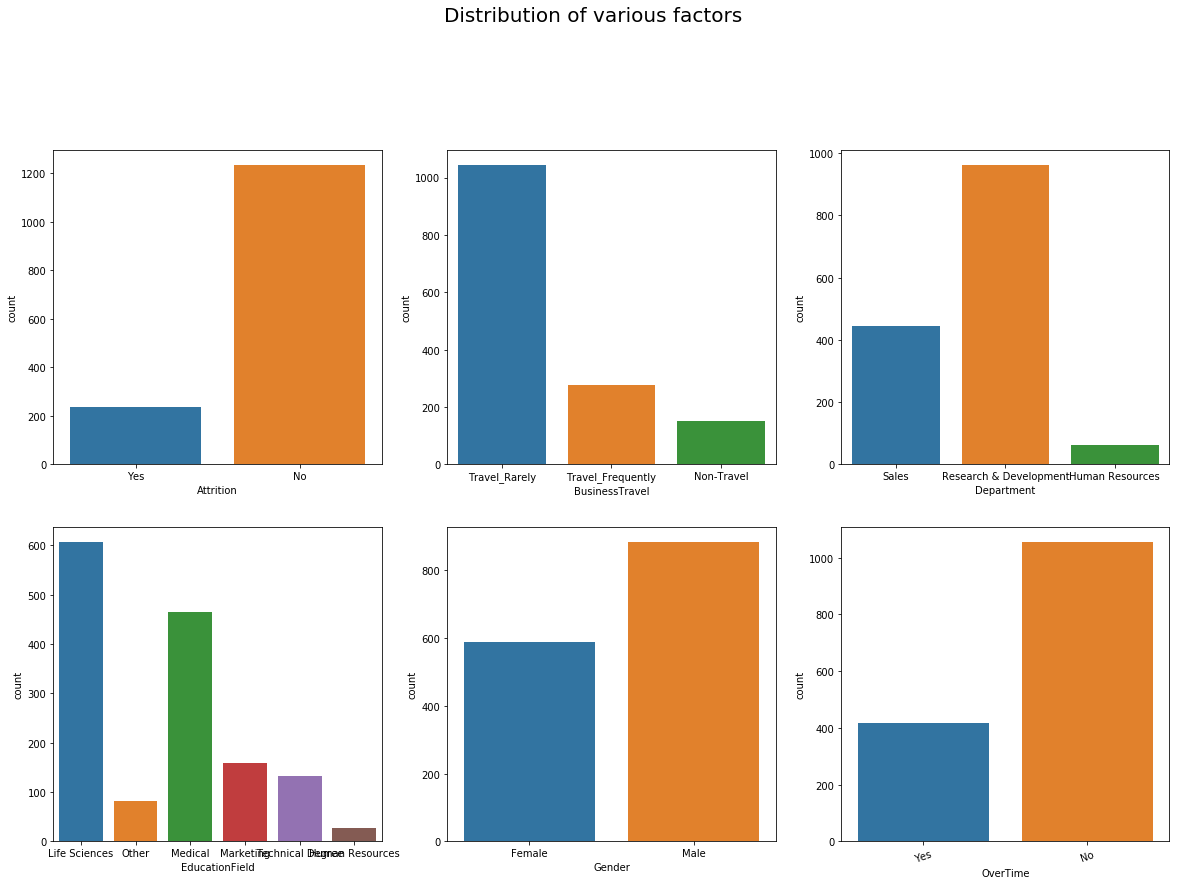

In [16]:
#Distribution of categorical variables

fig,ax = plt.subplots(2,3, figsize=(20,20))            
plt.suptitle("Distribution of various factors", fontsize=20)
sns.countplot(data['Attrition'], ax = ax[0,0]) 
sns.countplot(data['BusinessTravel'], ax = ax[0,1]) 
sns.countplot(data['Department'], ax = ax[0,2]) 
sns.countplot(data['EducationField'], ax = ax[1,0])
sns.countplot(data['Gender'], ax = ax[1,1])  
sns.countplot(data['OverTime'], ax = ax[1,2]) 
plt.xticks(rotation=20)
plt.subplots_adjust(bottom=0.4)
plt.show()

In [17]:
#Combine levels in a categorical variable by seeing their distribution

In [18]:
JobRoleCrossTab = pd.crosstab(data['JobRole'], data['Attrition'], margins=True)
JobRoleCrossTab

Attrition                    No  Yes   All
JobRole                                   
Healthcare Representative   122    9   131
Human Resources              40   12    52
Laboratory Technician       197   62   259
Manager                      97    5   102
Manufacturing Director      135   10   145
Research Director            78    2    80
Research Scientist          245   47   292
Sales Executive             269   57   326
Sales Representative         50   33    83
All                        1233  237  1470

In [19]:
JobRoleCrossTab.div(JobRoleCrossTab["All"],axis=0)

Attrition                        No       Yes  All
JobRole                                           
Healthcare Representative  0.931298  0.068702  1.0
Human Resources            0.769231  0.230769  1.0
Laboratory Technician      0.760618  0.239382  1.0
Manager                    0.950980  0.049020  1.0
Manufacturing Director     0.931034  0.068966  1.0
Research Director          0.975000  0.025000  1.0
Research Scientist         0.839041  0.160959  1.0
Sales Executive            0.825153  0.174847  1.0
Sales Representative       0.602410  0.397590  1.0
All                        0.838776  0.161224  1.0

In [20]:
data['JobRole'].replace(['Human Resources','Laboratory Technician'],value= 'HR-LT',inplace = True)
data['JobRole'].replace(['Research Scientist','Sales Executive'],value= 'RS-SE',inplace = True)
data['JobRole'].replace(['Healthcare Representative','Manufacturing Director'],value= 'HE-MD',inplace = True)

Here Human Resources & Laboratory Technician behaves the same way

Research Scientist & Sales Executive behaves the same way

Healthcare Representative & Manufacturing Director behaves the same way

so we can combine these levels

In [21]:
#Bucketing age variable
data.Age = pd.cut(data.Age,[18,30,35,45,61],
       labels=['Between 18 to 30','Between 30 to 35','Between 35 to 45','Between 45 to 60'],include_lowest=True)

In [22]:
#Bucketing Years at company variable
data.YearsAtCompany = pd.cut(data.YearsAtCompany,[0,2,4,6,10,41],
       labels=['Between 0 to 2','Between 2 to 4','Between 4 to 6','Between 6 to 10','Above 10'],include_lowest=True)

In [23]:
#Bucketing TotalWorkingYears at company variable
data.TotalWorkingYears = pd.cut(data.TotalWorkingYears,[0,2,4,6,10,41],
            labels=['Between 0 to 2','Between 2 to 4','Between 4 to 6','Between 6 to 10','Above 10'],include_lowest=True)

In [24]:
#Converting Yes / No values in Attrition column to 1 / 0
data.Attrition.replace(["Yes","No"],[1,0],inplace=True)
data.head()

Age  Attrition     BusinessTravel  DailyRate  \
0  Between 35 to 45          1      Travel_Rarely       1102   
1  Between 45 to 60          0  Travel_Frequently        279   
2  Between 35 to 45          1      Travel_Rarely       1373   
3  Between 30 to 35          0  Travel_Frequently       1392   
4  Between 18 to 30          0      Travel_Rarely        591   

               Department  DistanceFromHome      Education EducationField  \
0                   Sales                 1        College  Life Sciences   
1  Research & Development                 8  Below College  Life Sciences   
2  Research & Development                 2        College          Other   
3  Research & Development                 3         Master  Life Sciences   
4  Research & Development                 2  Below College        Medical   

  EnvironmentSatisfaction  Gender         ...           PerformanceRating  \
0                  Medium  Female         ...                   Excellent   
1                    High    Male         ...                 Outstanding   
2               Very High    Male         ...                   Excellent   
3               Very High  Female         ...                   Excellent   
4                     Low    Male         ...                   Excellent   

  RelationshipSatisfaction  StockOptionLevel TotalWorkingYears  \
0                      Low                 0   Between 6 to 10   
1                Very High                 1   Between 6 to 10   
2                   Medium                 0   Between 6 to 10   
3                     High                 0   Between 6 to 10   
4                Very High                 1    Between 4 to 6   

  TrainingTimesLastYear WorkLifeBalance   YearsAtCompany  YearsInCurrentRole  \
0                     0             Bad   Between 4 to 6                   4   
1                     3          Better  Between 6 to 10                   7   
2                     3          Better   Between 0 to 2                   0   
3                     3          Better  Between 6 to 10                   7   
4                     3          Better   Between 0 to 2                   2   

   YearsSinceLastPromotion YearsWithCurrManager  
0                        0                    5  
1                        1                    7  
2                        0                    0  
3                        3                    0  
4                        2                    2  

[5 rows x 31 columns]

In [25]:
#One hot encoding for categorical variables
final_data  = pd.get_dummies(data)
final_data.head().T

0      1     2      3      4
Attrition                               1      0     1      0      0
DailyRate                            1102    279  1373   1392    591
DistanceFromHome                        1      8     2      3      2
HourlyRate                             94     61    92     56     40
JobLevel                                2      2     1      1      1
MonthlyIncome                        5993   5130  2090   2909   3468
MonthlyRate                         19479  24907  2396  23159  16632
NumCompaniesWorked                      8      1     6      1      9
PercentSalaryHike                      11     23    15     11     12
StockOptionLevel                        0      1     0      0      1
TrainingTimesLastYear                   0      3     3      3      3
YearsInCurrentRole                      4      7     0      7      2
YearsSinceLastPromotion                 0      1     0      3      2
YearsWithCurrManager                    5      7     0      0      2
Age_Between 18 to 30                    0      0     0      0      1
Age_Between 30 to 35                    0      0     0      1      0
Age_Between 35 to 45                    1      0     1      0      0
Age_Between 45 to 60                    0      1     0      0      0
BusinessTravel_Non-Travel               0      0     0      0      0
BusinessTravel_Travel_Frequently        0      1     0      1      0
BusinessTravel_Travel_Rarely            1      0     1      0      1
Department_Human Resources              0      0     0      0      0
Department_Research & Development       0      1     1      1      1
Department_Sales                        1      0     0      0      0
Education_Bachelor                      0      0     0      0      0
Education_Below College                 0      1     0      0      1
Education_College                       1      0     1      0      0
Education_Doctor                        0      0     0      0      0
Education_Master                        0      0     0      1      0
EducationField_Human Resources          0      0     0      0      0
...                                   ...    ...   ...    ...    ...
JobRole_Sales Representative            0      0     0      0      0
JobSatisfaction_High                    0      0     1      1      0
JobSatisfaction_Low                     0      0     0      0      0
JobSatisfaction_Medium                  0      1     0      0      1
JobSatisfaction_Very High               1      0     0      0      0
MaritalStatus_Divorced                  0      0     0      0      0
MaritalStatus_Married                   0      1     0      1      1
MaritalStatus_Single                    1      0     1      0      0
OverTime_No                             0      1     0      0      1
OverTime_Yes                            1      0     1      1      0
PerformanceRating_Excellent             1      0     1      1      1
PerformanceRating_Outstanding           0      1     0      0      0
RelationshipSatisfaction_High           0      0     0      1      0
RelationshipSatisfaction_Low            1      0     0      0      0
RelationshipSatisfaction_Medium         0      0     1      0      0
RelationshipSatisfaction_Very High      0      1     0      0      1
TotalWorkingYears_Between 0 to 2        0      0     0      0      0
TotalWorkingYears_Between 2 to 4        0      0     0      0      0
TotalWorkingYears_Between 4 to 6        0      0     0      0      1
TotalWorkingYears_Between 6 to 10       1      1     1      1      0
TotalWorkingYears_Above 10              0      0     0      0      0
WorkLifeBalance_Bad                     1      0     0      0      0
WorkLifeBalance_Best                    0      0     0      0      0
WorkLifeBalance_Better                  0      1     1      1      1
WorkLifeBalance_Good                    0      0     0      0      0
YearsAtCompany_Between 0 to 2           0      0     1      0      1
YearsAtCompany_Between 2 to 4         

In [26]:
#Spliting target variable and independent variables
X = final_data.drop(['Attrition'], axis = 1)
y = final_data['Attrition']

In [27]:
#Splitting to training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 4, stratify=y)

#### Checking distribution of Attribution in train and test data

In [28]:
y_train.value_counts()

0    863
1    166
Name: Attrition, dtype: int64

In [29]:
# Checking distribtution of Target varaible in training dataset
y_train.value_counts()[1]/(y_train.value_counts()[0]+y_train.value_counts()[1])

0.16132167152575316

In [30]:
y_test.value_counts()

0    370
1     71
Name: Attrition, dtype: int64

In [31]:
y_test.value_counts()[1]/(y_test.value_counts()[0]+y_test.value_counts()[1])*100

16.099773242630384

# Logistic Regression

#### Training logistic regression model

In [32]:
# import library for LogisticRegression
from sklearn.linear_model import LogisticRegression

#Create a Logistic regression classifier
logreg = LogisticRegression()

# Train the model using the training sets 
logreg.fit(X_train, y_train)

C:\Users\Tejas.gowda\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

#### Model Evaluation

In [33]:
# Prediction on train data
y_pred = logreg.predict(X_train)

In [34]:
from sklearn import metrics
import numpy as np
print( 'Total Accuracy : ',round( metrics.accuracy_score(y_train, y_pred), 2 ) )
print( 'Precision : ',round( metrics.precision_score(y_train, y_pred), 2 ) )
print( 'Recall : ',round( metrics.recall_score(y_train, y_pred), 2 ) )

Total Accuracy :  0.89
Precision :  0.87
Recall :  0.37


Accuracy : the proportion of the total number of predictions that were correct.

Precision : the proportion of positive cases that were correctly identified.

Precision = Σ True positive/Σ Predicted condition positive

Recall : the proportion of actual positive cases which are correctly identified. 

Recall = Σ True positive / Σ Condition positive

In [35]:
#Create confusion matrix to find out Sensitivity and specificity
import seaborn as sn
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import auc,confusion_matrix
import matplotlib.pyplot as plt
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted, [1,0]).T
    sn.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["Yes","No"] , yticklabels = ["Yes","No"] )
    plt.ylabel('Predicted')
    plt.xlabel('Actual')
    plt.show()

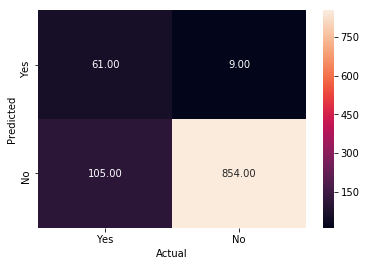

In [36]:
draw_cm(y_train, y_pred)

In [37]:
#AUC
import matplotlib.pyplot as plt
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 4))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

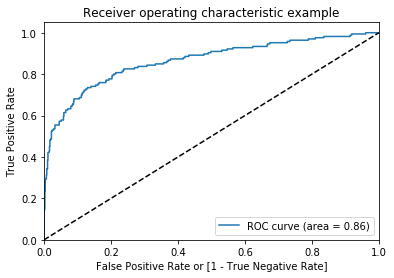

In [38]:
fpr, tpr, thresholds = draw_roc(y_train, logreg.predict_proba(X_train)[:,1])

The AUC of a classifier is equal to the probability that the classifier will rank a randomly chosen positive example higher than a randomly chosen negative example.

So, here we have 86% probability that, a randomly selected "Yes" will rank higher than a randomly selected "No". 

#### For test data

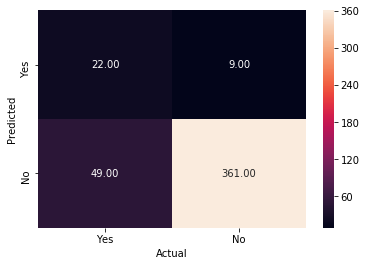

In [41]:
# Prediction on test data
y_pred_test = logreg.predict(X_test)

#Confusion metrix
draw_cm(y_test, y_pred_test)

In [42]:
print( 'Total Accuracy : ',round( metrics.accuracy_score(y_test, y_pred_test ), 2 ) )
print( 'Precision : ',round( metrics.precision_score(y_test, y_pred_test), 2 ) )
print( 'Recall : ',round( metrics.recall_score(y_test, y_pred_test), 2 ) )

Total Accuracy :  0.87
Precision :  0.71
Recall :  0.31


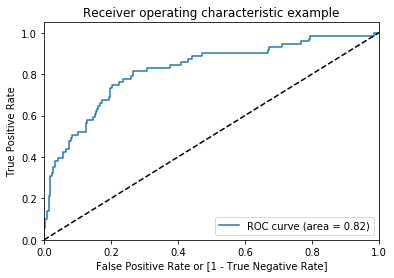

In [43]:
#AUC
fpr, tpr, thresholds = draw_roc(y_test, logreg.predict_proba(X_test)[:,1])

# Naive Bayes Classifier

#### Training model

In [44]:
#Import Library of Gaussian Naive Bayes model
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
model = GaussianNB()

# Train the model using the training sets 
model.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

#### Model Evaluation

In [45]:
print( 'Total Accuracy : ',round( metrics.accuracy_score(y_train, y_pred), 2 ) )
print( 'Precision : ',round( metrics.precision_score(y_train, y_pred), 2 ) )
print( 'Recall : ',round( metrics.recall_score(y_train, y_pred), 2 ) )

Total Accuracy :  0.89
Precision :  0.87
Recall :  0.37


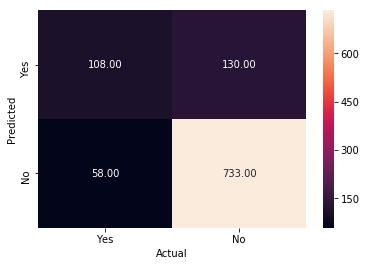

In [46]:
#Prediction on train data
y_pred = model.predict(X_train)

#confusion matrix 
draw_cm(y_train, y_pred)

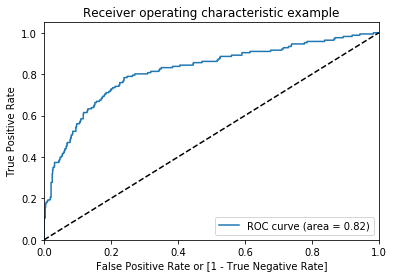

In [47]:
#AUC
fpr, tpr, thresholds = draw_roc(y_train, model.predict_proba(X_train)[:,1])

#### For test data

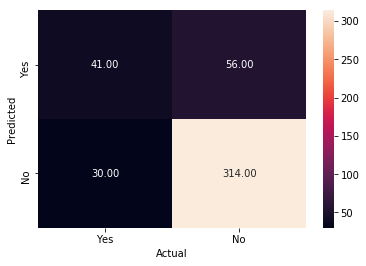

In [48]:
# Model prediction on test data
y_pred_test = model.predict(X_test)

#Confusion metrix
draw_cm(y_test, y_pred_test)

In [49]:
print( 'Total Accuracy : ',round( metrics.accuracy_score(y_test, y_pred_test ), 2 ) )
print( 'Precision : ',round( metrics.precision_score(y_test, y_pred_test), 2 ) )
print( 'Recall : ',round( metrics.recall_score(y_test, y_pred_test), 2 ) )

Total Accuracy :  0.8
Precision :  0.42
Recall :  0.58


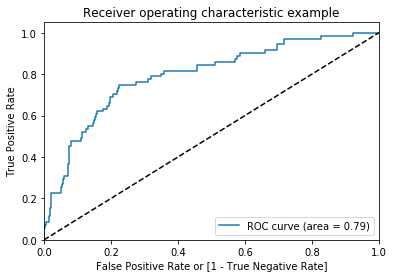

In [50]:
#AUC
fpr, tpr, thresholds = draw_roc(y_test, model.predict_proba(X_test)[:,1])

# Decision Tree Classifier

#### Training the model

In [51]:
# import Decision tree classifier
from sklearn.tree import DecisionTreeClassifier

#Create a Decision tree classifier model
clf = DecisionTreeClassifier(criterion = "gini" , 
                             min_samples_split = 100,
                             min_samples_leaf = 10,
                             max_depth = 50)

# Train the model using the training sets 
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=50,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=100,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

criterion : The function to measure the quality of a split. 

            “gini” for Gini Impurity 
            
            “entropy” for Information gain 
            
            “mse” for the mean squared error
            
max_features : The number of features (Predictors) to consider when looking for the best split 

max_depth :  The maximum depth of the tree. 

min_samples_split : The minimum number of samples for each split 

min_samples_leaf : The minimum number of samples required to be a  leaf node.

min_weight_fraction_leaf : The minimum weighted fraction of the sum total of weights required to be at a leaf node. Samples have equal weight when sample_weight is not provided. 

min_impurity_split : Threshold for early stopping in tree growth. A node will split if its impurity is above the threshold, otherwise it is a leaf (default = 1e-7) 

splitter : The strategy used to choose the split at each 


In [52]:
# Model prediction on train data
y_pred = clf.predict(X_train)

In [53]:
#Finding the variable with more importance
feature_importance = pd.DataFrame([X_train.columns,
                               clf.tree_.compute_feature_importances()])
feature_importance = feature_importance.T.sort_values(by = 1,ascending=False)[1:10]

No handles with labels found to put in legend.


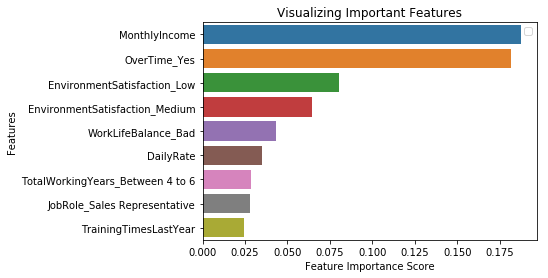

In [54]:
sns.barplot(x=feature_importance[1], y=feature_importance[0])
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

#### Model Evaluation

In [55]:
#Prediction on test data
y_pred = clf.predict(X_train)

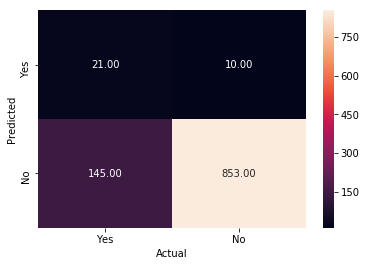

In [56]:
# Confusion matrix
draw_cm(y_train, y_pred)

In [57]:
print( 'Total Accuracy : ',round( metrics.accuracy_score(y_train, y_pred), 2 ) )
print( 'Precision : ',round( metrics.precision_score(y_train, y_pred), 2 ) )
print( 'Recall : ',round( metrics.recall_score(y_train, y_pred), 2 ) )

Total Accuracy :  0.85
Precision :  0.68
Recall :  0.13


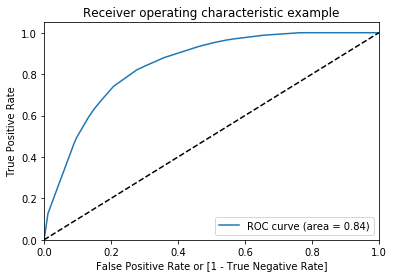

In [58]:
#AUC
fpr, tpr, thresholds = draw_roc(y_train, clf.predict_proba(X_train)[:,1])

#### For test data

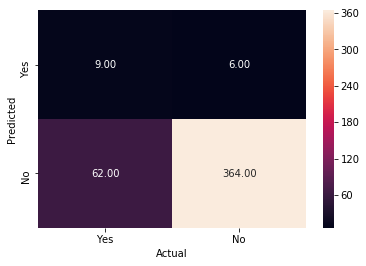

In [59]:
# Model prediction on train data
y_pred_test = clf.predict(X_test)

#Confusion metrix
draw_cm(y_test, y_pred_test)

In [60]:
print( 'Total Accuracy : ',round( metrics.accuracy_score(y_test, y_pred_test ), 2 ) )
print( 'Precision : ',round( metrics.precision_score(y_test, y_pred_test), 2 ) )
print( 'Recall : ',round( metrics.recall_score(y_test, y_pred_test), 2 ) )

Total Accuracy :  0.85
Precision :  0.6
Recall :  0.13


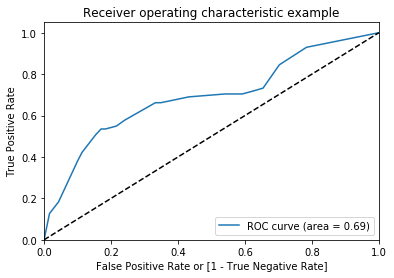

In [61]:
#AUC
fpr, tpr, thresholds = draw_roc(y_test, clf.predict_proba(X_test)[:,1])

# Random Forest Classifier

#### Training the model

In [62]:
#Import Library of RandomForestClassifier model
from sklearn.ensemble import RandomForestClassifier

#Create a Random Forest Classifier
rf = RandomForestClassifier()

# Train the model using the training sets 
rf.fit(X_train,y_train)


C:\Users\Tejas.gowda\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

bootstrap = method for sampling data points (with or without replacement)

n_estimators = number of trees in the forest

criterion : The function to measure the quality of a split. 

max_features = max number of features considered for splitting a node

max_depth = max number of levels in each decision tree

min_samples_split = min number of data points placed in a node before the node is split

min_samples_leaf = min number of data points allowed in a leaf node

n_jobs = This parameter tells the engine how many processors is it allowed to use.

random_state = This parameter makes a solution easy to replicate.

min_impurity_decrease : A node will be split if this split induces a decrease of the impurity greater than or equal to this value.

oob_score = This is a random forest cross validation method. It is very similar to leave one out validation technique, however, this is so much faster.


No handles with labels found to put in legend.


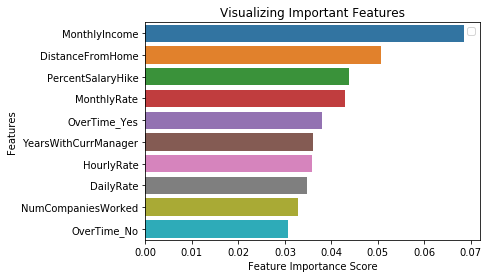

In [63]:
#Finding the variable with more importance
feature_imp = pd.Series(rf.feature_importances_,index= X_train.columns).sort_values(ascending=False)
# Creating a bar plot
feature_imp=feature_imp[0:10,]
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

#### Model Evaluation

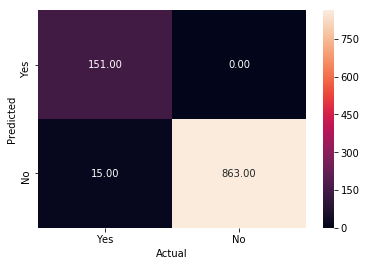

In [64]:
#Prediction on train data
y_pred = rf.predict(X_train)

#Confusion metrix
draw_cm(y_train, y_pred)

In [65]:
print( 'Total Accuracy : ',round( metrics.accuracy_score(y_train, y_pred), 2 ) )
print( 'Precision : ',round( metrics.precision_score(y_train, y_pred), 2 ) )
print( 'Recall : ',round( metrics.recall_score(y_train, y_pred), 2 ) )

Total Accuracy :  0.99
Precision :  1.0
Recall :  0.91


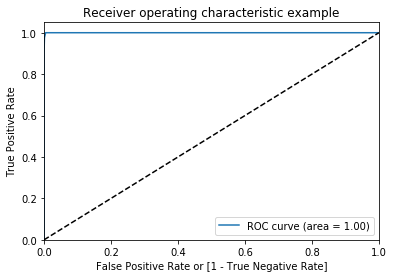

In [66]:
#AUC
fpr, tpr, thresholds = draw_roc(y_train, rf.predict_proba(X_train)[:,1])

#### For test data

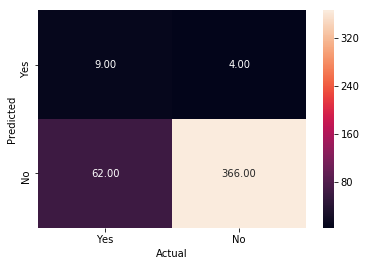

In [67]:
# Model prediction on test data
y_pred_test = rf.predict(X_test)

#Confusion metrix
draw_cm(y_test, y_pred_test)

In [68]:
print( 'Total Accuracy : ',round( metrics.accuracy_score(y_test, y_pred_test ), 2 ) )
print( 'Precision : ',round( metrics.precision_score(y_test, y_pred_test), 2 ) )
print( 'Recall : ',round( metrics.recall_score(y_test, y_pred_test), 2 ) )

Total Accuracy :  0.85
Precision :  0.69
Recall :  0.13


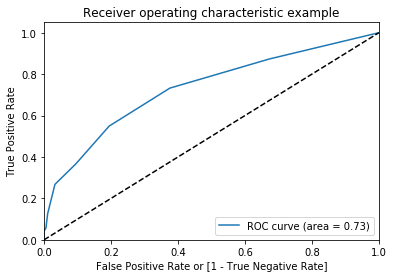

In [69]:
#AUC
fpr, tpr, thresholds = draw_roc(y_test, rf.predict_proba(X_test)[:,1])

# XGBoost Classifier

#### Training the model

In [70]:
#Import Library of XGBClassifier model
from xgboost import XGBClassifier

#Create a XG Boost Classifier
model = XGBClassifier(learning_rate =0.1,
 n_estimators=100,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1)


# Train the model using the training sets 
model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=4, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.8)

max_depth (int) – Maximum tree depth for base learners.

learning_rate (float) – Boosting learning rate (xgb’s “eta”)

n_estimators (int) – Number of boosted trees to fit.

gamma (float) – Minimum loss reduction required to make a further partition on a leaf node of the tree.

min_child_weight (int) – Minimum sum of instance weight(hessian) needed in a child.

subsample (float) – Subsample ratio of the training instance.

colsample_bytree (float) – Subsample ratio of columns when constructing each tree.

objective (string or callable) – Specify the learning task and the corresponding learning objective or a custom objective function to be used (see note below).

nthread (int) – Number of parallel threads used to run xgboost. (Deprecated, please use n_jobs)

scale_pos_weight (float) – Balancing of positive and negative weights.


No handles with labels found to put in legend.


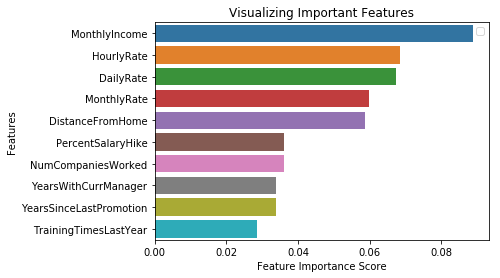

In [71]:
#Finding the variable with more importance
feature_imp = pd.Series(model.feature_importances_,index= X_train.columns).sort_values(ascending=False)
# Creating a bar plot
feature_imp=feature_imp[0:10,]
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

#### Model Evaluation

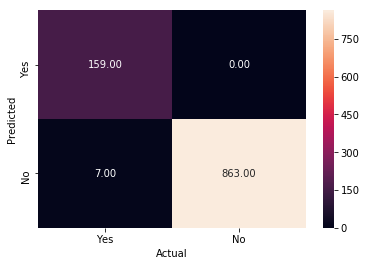

In [72]:
#Prediction on train data
y_pred = model.predict(X_train)

#Confusion matrix
draw_cm(y_train, y_pred)

In [73]:
print( 'Total Accuracy : ',round( metrics.accuracy_score(y_train, y_pred), 2 ) )
print( 'Precision : ',round( metrics.precision_score(y_train, y_pred), 2 ) )
print( 'Recall : ',round( metrics.recall_score(y_train, y_pred), 2 ) )

Total Accuracy :  0.99
Precision :  1.0
Recall :  0.96


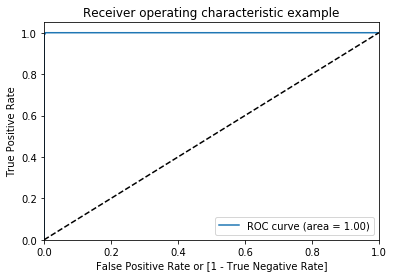

In [74]:
#AUC
fpr, tpr, thresholds = draw_roc(y_train, model.predict_proba(X_train)[:,1])

#### For test data

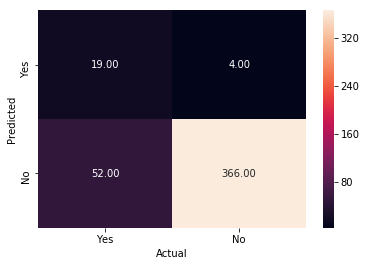

In [75]:
# Model prediction on test data
y_pred_test = model.predict(X_test)

#Confusion metrix
draw_cm(y_test, y_pred_test)

In [76]:
print( 'Total Accuracy : ',round( metrics.accuracy_score(y_test, y_pred_test ), 2 ) )
print( 'Precision : ',round( metrics.precision_score(y_test, y_pred_test), 2 ) )
print( 'Recall : ',round( metrics.recall_score(y_test, y_pred_test), 2 ) )

Total Accuracy :  0.87
Precision :  0.83
Recall :  0.27


AUC :  0.8158355538637229


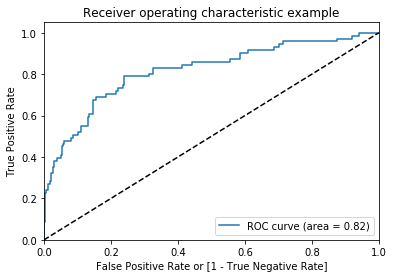

In [77]:
#AUC
fpr, tpr, thresholds =  roc_curve(y_test, model.predict_proba(X_test)[:,1])
print( 'AUC : ', auc(fpr, tpr))
fpr, tpr, thresholds = draw_roc(y_test, model.predict_proba(X_test)[:,1])

# SVM Classifier

In [78]:
# Creating scaled set to be used in model to improve our results
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

C:\Users\Tejas.gowda\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Tejas.gowda\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Tejas.gowda\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  """


#### Training the model

In [79]:
#Import Library of Support Vector Machine model
from sklearn import svm

#Create a Support Vector Classifier
svc = svm.SVC()

# Train the model using the training sets 
svc.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

C : float, optional (default=1.0): The penalty parameter of the error term. It controls the trade off between smooth decision boundary and classifying the training points correctly.

kernel : string, optional (default='rbf’): kernel parameters selects the type of hyperplane used to separate the data. It must be one of 'linear', 'poly', 'rbf', 'sigmoid', 'precomputed’ or a callable.

degree : int, optional (default=3): Degree of the polynomial kernel function (‘poly’). Ignored by all other kernels.

gamma : float, optional (default='auto’): It is for non linear hyperplanes. The higher the gamma value it tries to exactly fit the training data set. Current default is 'auto' which uses 1 / n_features.

coef0 : float, optional (default=0.0): Independent term in kernel function. It is only significant in 'poly' and 'sigmoid'.

shrinking : boolean, optional (default=True): Whether to use the shrinking heuristic.

For Classification only:

probability : boolean, optional (default=False): Whether to enable probability estimates. This must be enabled prior to calling `fit`, and will slow down that method.

class_weight : {dict, 'balanced'}, optional: Set the parameter C of class i to class_weight[i]*C for SVC. If not given, all classes are supposed to have weight one. The "balanced" mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as ``n_samples / (n_classes * np.bincount(y))``


#### Model Evaluation

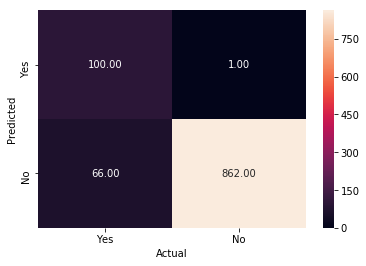

In [80]:
#Prediction on train data
y_pred = svc.predict(X_train)

#Confusion Matrix
draw_cm(y_train, y_pred)

In [81]:
print( 'Total Accuracy : ',round( metrics.accuracy_score(y_train, y_pred), 2 ) )
print( 'Precision : ',round( metrics.precision_score(y_train, y_pred), 2 ) )
print( 'Recall : ',round( metrics.recall_score(y_train, y_pred), 2 ) )

Total Accuracy :  0.93
Precision :  0.99
Recall :  0.6


AUC :  0.8006254450013263


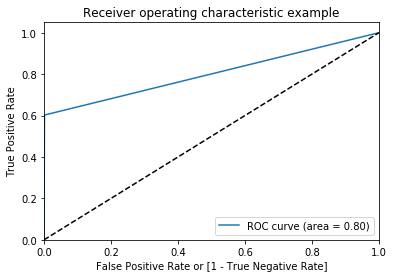

In [82]:
#AUC
fpr, tpr, thresholds =  roc_curve(y_train, y_pred)
print( 'AUC : ', auc(fpr, tpr))
fpr, tpr, thresholds = draw_roc(y_train, y_pred)

#### For test data

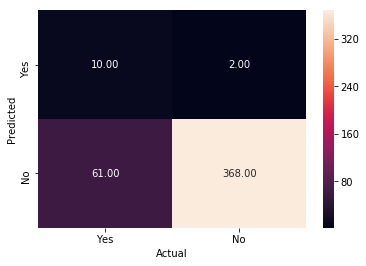

In [83]:
# Model prediction on test data
y_pred_test = svc.predict(X_test)

#Confusion metrix
draw_cm(y_test, y_pred_test)

In [84]:
print( 'Total Accuracy : ',round( metrics.accuracy_score(y_test, y_pred_test ), 2 ) )
print( 'Precision : ',round( metrics.precision_score(y_test, y_pred_test), 2 ) )
print( 'Recall : ',round( metrics.recall_score(y_test, y_pred_test), 2 ) )

Total Accuracy :  0.86
Precision :  0.83
Recall :  0.14


AUC :  0.567719832508565


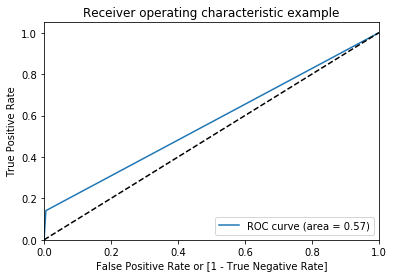

In [85]:
#AUC
fpr, tpr, thresholds =  roc_curve(y_test, y_pred_test)
print( 'AUC : ', auc(fpr, tpr))
fpr, tpr, thresholds = draw_roc(y_test, y_pred_test)